<a href="https://www.kaggle.com/code/mesutssmn/the-simpsons-character-prediction-cnn?scriptVersionId=166650666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [213]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [214]:
train_dir = "/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"
test_dir = "/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset"

In [215]:
train_img = [os.path.join(train_dir, f) for f in os.listdir(train_dir)]
test_img = [os.path.join(test_dir, f) for f in os.listdir(test_dir)]

In [216]:
df_train = pd.read_csv("/kaggle/input/the-simpsons-characters-dataset/number_pic_char.csv")

In [217]:
len(df_train.name.unique())

47

In [218]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.2)

In [219]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(80,80),
                                                    batch_size=150,
                                                    subset = 'training',
                                                    class_mode='categorical',
                                                    color_mode='rgb')


Found 33511 images belonging to 43 classes.


In [220]:
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [221]:
val_generator = val_datagen.flow_from_directory(train_dir,
                                                target_size=(80,80),
                                                batch_size=150,
                                                subset = 'validation',
                                                class_mode='categorical',
                                                color_mode='rgb')

Found 8355 images belonging to 43 classes.


In [222]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [223]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(80,80),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

Found 990 images belonging to 1 classes.


In [224]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation="relu"))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation="relu")) 
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(43, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [225]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 18, 18, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 43)             │        44,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,625,675 (67.24 MB)

 Trainable params: 17,625,675 (67.24 MB)

 Non-trainable params: 0 (0.00 B)

In [226]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [227]:
"""
conv_model = tf.keras.applications.VGG16(
                  weights='imagenet',
                  include_top=False,
                  input_shape=(80, 80, 3))
                  
model = tf.keras.models.Sequential()

model.add(conv_model)

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(43, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

model.summary()"""

"\nconv_model = tf.keras.applications.VGG16(\n                  weights='imagenet',\n                  include_top=False,\n                  input_shape=(80, 80, 3))\n                  \nmodel = tf.keras.models.Sequential()\n\nmodel.add(conv_model)\n\nmodel.add(tf.keras.layers.GlobalAveragePooling2D())\n\nmodel.add(tf.keras.layers.Flatten())\n\nmodel.add(tf.keras.layers.Dropout(0.5))\n\nmodel.add(tf.keras.layers.Dense(43, activation='sigmoid'))\n\nmodel.compile(loss='categorical_crossentropy',\n              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),\n              metrics=['acc'])\n\nmodel.summary()"

In [228]:
callbacks = [
tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
    min_delta = 0.001,
    mode="max",
    patience = 10,
    verbose = 1,
    restore_best_weights = True),
    
tf.keras.callbacks.ModelCheckpoint(
    filepath='./model.keras',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]

In [232]:
history = model.fit(
    train_generator,
    epochs=30,
    callbacks=callbacks,
    validation_data=val_generator,
    batch_size=300)

KeyboardInterrupt: 

/tmp/ipykernel_34/3325392947.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, "bo", label="Tranning_acc", color = "red")
/tmp/ipykernel_34/3325392947.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, "b", label="validation_acc", color = "blue")


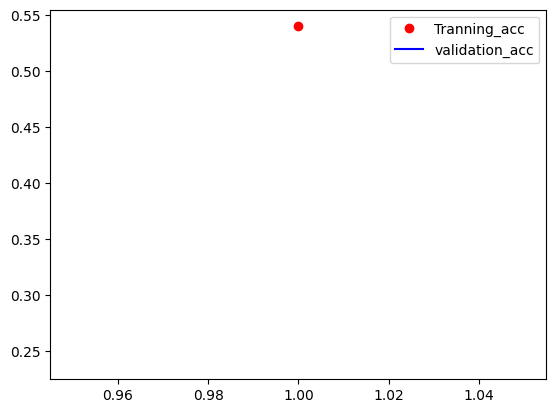

In [233]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Tranning_acc", color = "red")
plt.plot(epochs, val_acc, "b", label="validation_acc", color = "blue")
plt.legend()
plt.show()

In [234]:
score = model.evaluate(val_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.1788 - loss: 3.7369
Accuracy: 17.70%
Loss:  3.690537691116333


In [235]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [236]:
saved_model = tf.keras.models.load_model('./model.keras')
saved_model

<Sequential name=sequential_15, built=True>

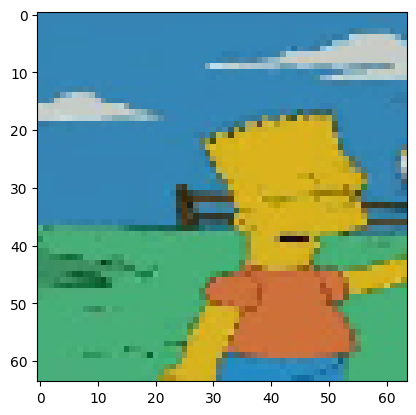

In [237]:
img_path = "/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_28.jpg"
img = image.load_img(img_path, target_size=(64, 64, 3))
plt.imshow(img)
plt.show()